# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best)“off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [1]:
import numpy as np
from cvxpy import *
import matplotlib.pyplot as plt

### Subsection 1

In [2]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

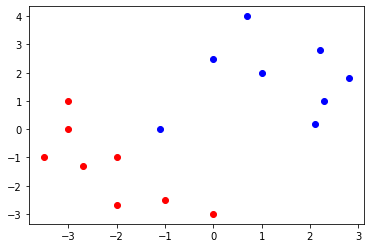

In [3]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()
plt.clf()
plt.cla()
plt.close()

In [4]:
# data preparation 
x_new = []
y_new = []
for i in range(X.shape[0]):
    if y[i]==1:
        x_new.append(X[i])
    else:
        y_new.append(X[i])
    
x_new = np.array(x_new)
y_new = np.array(y_new)

In [5]:
y_new

array([[-1.1,  0. ],
       [ 0. ,  2.5],
       [ 1. ,  2. ],
       [ 0.7,  4. ],
       [ 2.1,  0.2],
       [ 2.3,  1. ],
       [ 2.8,  1.8],
       [ 2.2,  2.8]])

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

![title](1.jpg)

![title](2.jpg)

In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [6]:
def get_boundary(x_data, y_data, all_x, y_labels):
    num_classes = 2
    n_x = x_data.shape[0]
    n_y = y_data.shape[0]

    weights = Variable((num_classes,1))
    bias = Variable()

    X_const = [weights.T @ x_data[i] + bias >= 1  for i in range(n_x)]
    y_const = [weights.T @ y_data[i] + bias <= -1 for i in range(n_y)]

    total_constraint = X_const +  y_const
    objectiveFunction = Minimize((norm(weights,2)))
    
    prob = Problem(objectiveFunction, total_constraint)
    prob.solve()
    
    weights = weights.value
    bias = bias.value
    print("\nfinal weights : ", weights)
    print("\nfinal bias : ", bias)
    
#     if all_x != None:
    plot_points(all_x, y_labels)
    
    X_ = np.linspace(-5, 5, 20)

    plt.plot(X_, (-bias - (weights[0]*X_)+1)/weights[1] ,'g--')
    plt.plot(X_, (-bias - (weights[0]*X_)-1)/weights[1] , 'y--')
    plt.plot(X_, (-bias - (weights[0]*X_))/weights[1] , 'm')
    
    return weights, bias


final weights :  [[-1.73913043]
 [-1.30434783]]

final bias :  -2.9130434783188317


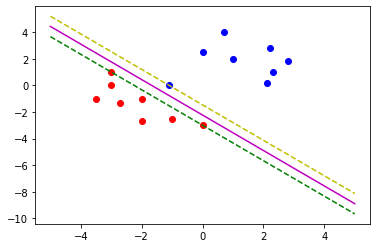

In [7]:
weights1, bias1 = get_boundary(x_new, y_new, X, y)

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here**


positive support vectors :  [array([-3.,  1.]), array([ 0., -3.])]

negative support vectors :  [array([-1.1,  0. ])]

final weights :  [[-1.73913043]
 [-1.30434783]]

final bias :  -2.9130434783188317


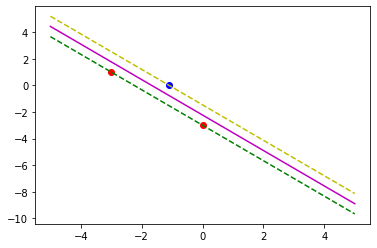

In [8]:
# getting support vectors
x_sp = []
x_sp_label = []
y_sp = []
y_sp_label = []

for i in range(X.shape[0]):
    val = round((np.dot(X[i],weights1)+bias1)[0], 3)
#     print(val)
    if val == 1.0:
        x_sp.append(X[i])
        x_sp_label.append(y[i])
    elif val == -1.0:
        y_sp.append(X[i])
        y_sp_label.append(y[i])

print ("\npositive support vectors : ", x_sp)
print ("\nnegative support vectors : ", y_sp)

sp_all = x_sp + y_sp
sp_all__label = x_sp_label + y_sp_label
w, b = get_boundary(x_new, y_new, np.array(sp_all), np.array(sp_all__label))

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

In [9]:
# Re-create the Synthetic Data by adding the points and visualize the points
X_updated = np.append(X, [[-4,-10]], axis=0)
X_updated = np.append(X_updated, [[4,4]], axis=0)
y_updated = np.append(y, [1,-1], axis=0)
# y_updated = np.append(y_updated, -1, axis=0)

# print ("x_updated : ", X_updated)
# print ("y_updated : ", y_updated)

# adding positive and negative labels to its class list:
x_new2 = np.append(x_new, [[-4,-10]], axis=0)
y_new2 = np.append(y_new, [[4,4]], axis=0)


final weights :  [[-1.73913044]
 [-1.30434783]]

final bias :  -2.913043479077382


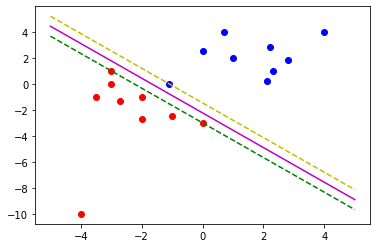

In [10]:
# Solve for the decision boundary using this modified dataset
w2, b2 = get_boundary(x_new2, y_new2, X_updated, y_updated)

### Comparing weights and bias of previos data, and data after adding these 2 new points

In [11]:
print (" Old data weights and bias : ", weights1, bias1)
print (" \n\nnew data weights and bias : ", w2, b2)

 Old data weights and bias :  [[-1.73913043]
 [-1.30434783]] -2.9130434783188317
 

new data weights and bias :  [[-1.73913044]
 [-1.30434783]] -2.913043479077382


### OBSERVATION : Decision boundary does not get changed as we see that weights and bias does not change on adding new points. 
It is because the 2 new points added are on the either side of the margins (support vectors). If the new points would be been between the 2 margins, then in case of "hard-margin SVM", our decision boundary would have definately changed.
### ---------------------------------------------------------------------------------------------------------------------------------------------------------

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

In [35]:
def soft_margin_svm(x_data, y_data, all_x, y_labels, C=1):
#     print ("x_data : ", x_data.shape)
#     print("\ny_data : ", y_data.shape)
#     print ("\nall_x : ", all_x.shape)
#     print ("\n y_labels : ", y_labels.shape)
    
    num_classes = 2
    n_x = x_data.shape[0]
    n_y = y_data.shape[0]

    weights = Variable((num_classes,1))
    bias = Variable()
    u = Variable(n_x)
    v = Variable(n_y)
#     C = 0.01
    
    x_constraints = [weights.T @ x_data[i] - bias >= 1 - u[i]  for i in range(n_x)]
    y_constraints = [weights.T @ y_data[i] - bias <= -1 + v[i] for i in range(n_y)]
    u_constraints = [u[i] >= 0  for i in range(n_x)]
    v_constraints = [v[i] >= 0  for i in range(n_y)]
    total_constraint = x_constraints +  y_constraints + u_constraints + v_constraints
    
    objectiveFunction = Minimize(norm(weights,2) + C*(np.ones(n_x)@u + np.ones(n_y)@v) )
    
    prob = Problem(objectiveFunction, total_constraint)
    prob.solve()
    
    weights = weights.value
    bias = bias.value
#     print("\nfinal weights : ", weights)
#     print("\nfinal bias : ", bias)
    
#     if all_x != None:
    plot_points(all_x, y_labels)
    
    X_ = np.linspace(-5, 5, 20)

    plt.plot(X_, (-bias - (weights[0]*X_)+1)/weights[1] ,'g--')
    plt.plot(X_, (-bias - (weights[0]*X_)-1)/weights[1] , 'y--')
    plt.plot(X_, (-bias - (weights[0]*X_))/weights[1] , 'm')
    
    return weights, bias

x_data :  (9, 2)

y_data :  (9, 2)

all_x :  (18, 2)

 y_labels :  (18,)


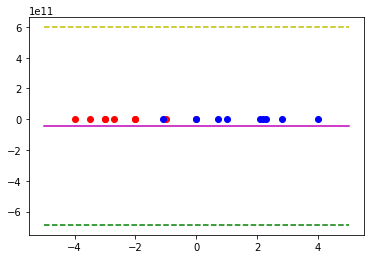

In [30]:
# Write your code here for C= 0.01
## OPTIMIZATION- in CvxPy!
w, b = soft_margin_svm(x_new2, y_new2, X_updated, y_updated, C=0.01)

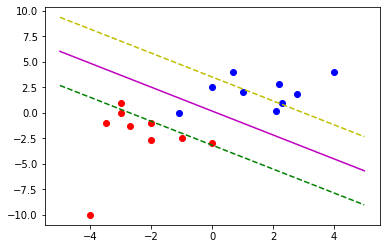

In [14]:
# Write your code here for C= 0.1
w, b = soft_margin_svm(x_new2, y_new2, X_updated, y_updated, C=0.1)

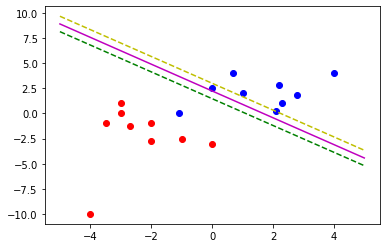

In [15]:
# Write your code here for C= 3
w, b = soft_margin_svm(x_new2, y_new2, X_updated, y_updated, C=3)

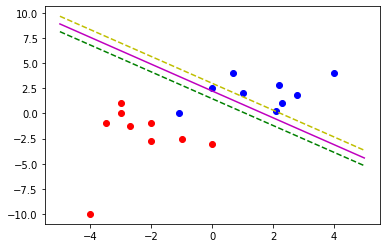

In [16]:
# Write your code here for C= 10
w, b = soft_margin_svm(x_new2, y_new2, X_updated, y_updated, C=10)

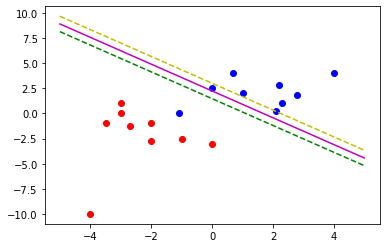

In [17]:
# Write your code here for C= 100
w_soft, b_soft = soft_margin_svm(x_new2, y_new2, X_updated, y_updated, C=100)

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?


positive support vectors :  []

negative support vectors :  [array([2.1, 0.2])]


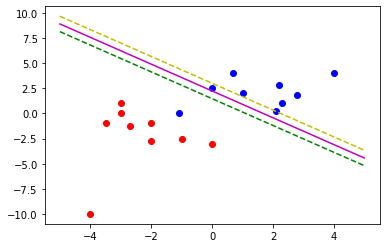

In [18]:
# Write your Code here
w_soft, b_soft = soft_margin_svm(x_new2, y_new2, X_updated, y_updated, C=100)

# getting support vectors
x_sp_soft = []
x_sp_label_soft = []
y_sp_soft = []
y_sp_label_soft = []

for i in range(X_updated.shape[0]):
    val = round((np.dot(X_updated[i],w_soft)+b_soft)[0], 3)
#     print(val)
    if val == 1.0:
        x_sp_soft.append(X[i])
        x_sp_label_soft.append(y[i])
    elif val == -1.0:
        y_sp_soft.append(X[i])
        y_sp_label_soft.append(y[i])

print ("\npositive support vectors : ", x_sp_soft)
print ("\nnegative support vectors : ", y_sp_soft)

# sp_all_soft = x_sp_soft + y_sp_soft
# sp_all_label_soft = x_sp_label_soft + y_sp_label_soft
# w, b = get_boundary(x_new, y_new, np.array(sp_all_soft), np.array(sp_all_label_soft))

In [19]:
x_ind_list = []
for item in x_sp_soft:
#     print("item : ", item)
    ind = np.where(x_new2 == item)
    x_ind_list.append(ind[0][0])

x_new_soft = np.delete(x_new2, x_ind_list, axis=0)

y_ind_list = []
for item in y_sp_soft:
#     print("item : ", item)
    ind = np.where(y_new2 == item)
    y_ind_list.append(ind[0][0])

y_new_soft = np.delete(y_new2, y_ind_list, axis=0)

indices_to_delete = []
for item in x_sp_soft:
#     print("item : ", item)
    ind = np.where(X_updated == item)
    indices_to_delete.append(ind[0][0])
    
for item in y_sp_soft:
#     print("item : ", item)
    ind = np.where(X_updated == item)
#     print("ind found : ", ind)
    indices_to_delete.append(ind[0][0])

    
X_final = np.delete(X_updated, indices_to_delete, axis=0)
y_final = np.delete(y_updated, indices_to_delete, axis=0)

print("\n indices to delete : ",indices_to_delete)
print("shape of x earlier: ", X_updated.shape)
print("shape of y earlier: ", y_updated.shape)
print("shape of x_new earlier: ", x_new2.shape)
print("shape of y_new earlier: ", y_new2.shape)

print("shape of x now after deletion: ", X_final.shape)
print("shape of y now after deletion: ", y_final.shape)
print("shape of x_new after deletion: ", x_new_soft.shape)
print("shape of y_new after deletion: ", y_new_soft.shape)



 indices to delete :  [12]
shape of x earlier:  (18, 2)
shape of y earlier:  (18,)
shape of x_new earlier:  (9, 2)
shape of y_new earlier:  (9, 2)
shape of x now after deletion:  (17, 2)
shape of y now after deletion:  (17,)
shape of x_new after deletion:  (9, 2)
shape of y_new after deletion:  (8, 2)


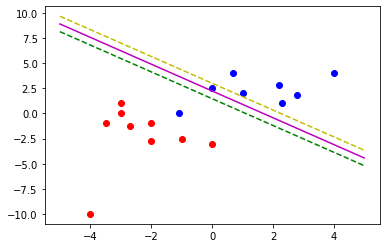

In [20]:
w_soft_new, b_soft_new = soft_margin_svm(x_new_soft, y_new_soft, X_final, y_final, C=100)

### Comparing results of data before removing support vectors and after removing support vectors

before deleting supoort vectors : 


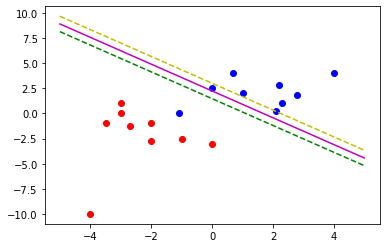

after deleting supoort vectors : 


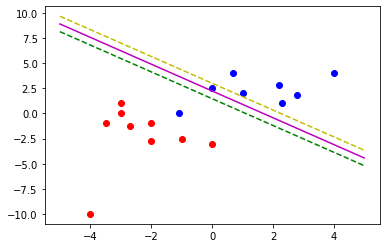

 Old data weights and bias :  [[-1.73913043]
 [-1.30434783]] 2.9130434784426154
 

new data weights and bias :  [[-1.73913043]
 [-1.30434783]] 2.913043478450465


In [36]:
# fig, axs = plt.subplots(1,2)
w_soft, b_soft = soft_margin_svm(x_new2, y_new2, X_updated, y_updated, C=100)
print ("before deleting supoort vectors : ")
plt.show()
plt.clf()
plt.cla()
plt.close()
w_soft_new, b_soft_new = soft_margin_svm(x_new_soft, y_new_soft, X_final, y_final, C=100)
print ("after deleting supoort vectors : ")
plt.show()
plt.clf()
plt.cla()
plt.close()
print (" Old data weights and bias : ", w_soft, b_soft )
print (" \n\nnew data weights and bias : ", w_soft_new, b_soft_new)



### On comapring the plots and weights values, we see that decision boundary changes slightly on removing the support vector.  This is because margins are made on support vectors and on removing support vectors, new margins are created. thus changing decision boundary.

### Subsection 2

In [22]:
# !pip install python-mnist
# !rm -rf samples
# !mkdir samples
# !wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
# !gunzip samples/train-images-idx3-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
# !gunzip samples/train-labels-idx1-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
# !gunzip samples/t10k-images-idx3-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
# !gunzip samples/t10k-labels-idx1-ubyte.gz

--2021-03-10 13:34:00--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 2606:4700:90ce:3911:88de:105:be93:f32b, 172.67.171.76, 104.21.29.36
Connecting to yann.lecun.com (yann.lecun.com)|2606:4700:90ce:3911:88de:105:be93:f32b|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

    train-images-id  12%[=>                  ]   1.15M   502KB/s               ^C

gzip: samples/train-images-idx3-ubyte.gz: unexpected end of file
--2021-03-10 13:34:03--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 2606:4700:90ce:3911:88d7:105:be93:f32b, 172.67.171.76, 104.21.29.36
Connecting to yann.lecun.com (yann.lecun.com)|2606:4700:90ce:3911:88d7:105:be93:f32b|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘samples/tr

In [29]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [30]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [31]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [32]:
images_train[0].shape

(784,)

In [34]:
# labels_train[:1000]

In [35]:
#normalizing data : 
scaler = MinMaxScaler()
scaler.fit(images_train)
images_train_normalized = scaler.transform(images_train)
print ("images_train normalized shape : ", images_train_normalized.shape)
# data_normalized

images_train normalized shape :  (60000, 784)


In [36]:
#normalizing data : 
scaler = MinMaxScaler()
scaler.fit(images_test)
images_test_normalized = scaler.transform(images_test)
print ("images_train normalized shape : ", images_test_normalized.shape)
# data_normalized

images_train normalized shape :  (10000, 784)


### Taking subset of data so as to reduce computational time

In [37]:
x_tr = images_train_normalized[:1000,:]
print("xtr shape : ", x_tr.shape)
x_ts = images_test_normalized[:300,:]
y_tr = labels_train[:1000]
print("ytr shape : ", y_tr.shape)
y_ts = labels_test[:300]

xtr shape :  (1000, 784)
ytr shape :  (1000,)


### Linear Kernel :

In [38]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(x_tr, y_tr)
predicted = linear_svc.predict(x_ts)
# print ("predicted : ", predicted)
print("accuracy score of linear kernel : ", metrics.accuracy_score(y_ts, predicted))

accuracy score of linear kernel :  0.9033333333333333


### RBF Kernel :

In [39]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(x_tr, y_tr)
predicted = rbf_svc.predict(x_ts)
# print ("predicted : ", predicted)
print("accuracy score of linear kernel : ", metrics.accuracy_score(y_ts, predicted))

accuracy score of linear kernel :  0.9033333333333333


### Poly Kernel

In [40]:
poly_svc = svm.SVC(kernel='poly')
poly_svc.fit(x_tr, y_tr)
predicted = poly_svc.predict(x_ts)
# print ("predicted : ", predicted)
print("accuracy score of poly kernel : ", metrics.accuracy_score(y_ts, predicted))

accuracy score of poly kernel :  0.85


### Sigmoid Kernel:

In [41]:
sigmoid_svc = svm.SVC(kernel='sigmoid')
sigmoid_svc.fit(x_tr, y_tr)
predicted = sigmoid_svc.predict(x_ts)
# print ("predicted : ", predicted)
print("accuracy score of sigmoid kernel : ", metrics.accuracy_score(y_ts, predicted))

accuracy score of sigmoid kernel :  0.8366666666666667


### We see that linear-kernel gives good accuracy .

In [58]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],'C': [5,10,100]}]

model = SVC(kernel="linear")

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_tr, y_tr)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(kernel='linear'),
             param_grid=[{'C': [5, 10, 100], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [59]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.89 corresponding to hyperparameters {'C': 5, 'gamma': 0.01}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [60]:
model = SVC(C=best_hyperparams['C'], gamma=best_hyperparams['gamma'], kernel="rbf")

model.fit(x_tr, y_tr)
y_pred = model.predict(x_ts)

print("best accuracy obtained : ", metrics.accuracy_score(y_ts, y_pred), "\n")

best accuracy obtained :  0.92 



### Plotting actual image and predicted label :

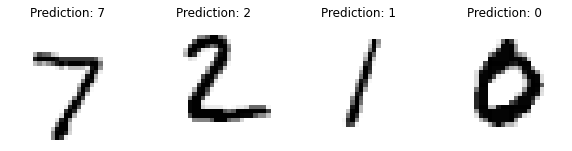

In [61]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_ts, y_pred):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [62]:
print(f"Classification report for best model:\n"
      f"{metrics.classification_report(y_ts, y_pred)}\n")

Classification report for best model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.98      1.00      0.99        41
           2       0.91      0.97      0.94        32
           3       0.91      0.83      0.87        24
           4       0.92      0.89      0.90        37
           5       0.78      0.86      0.82        29
           6       0.95      0.88      0.91        24
           7       0.91      0.94      0.93        34
           8       1.00      0.86      0.92        21
           9       0.89      0.91      0.90        34

    accuracy                           0.92       300
   macro avg       0.92      0.91      0.92       300
weighted avg       0.92      0.92      0.92       300




Confusion matrix for best model :
[[24  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  1  0  0  0  0  0]
 [ 0  0  0 20  0  4  0  0  0  0]
 [ 0  0  0  0 33  0  1  0  0  3]
 [ 0  1  1  1  0 25  0  1  0  0]
 [ 0  0  2  0  0  1 21  0  0  0]
 [ 0  0  0  0  1  0  0 32  0  1]
 [ 0  0  0  0  1  1  0  1 18  0]
 [ 0  0  0  1  0  1  0  1  0 31]]


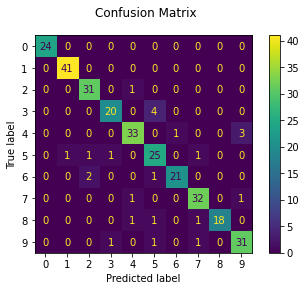

In [63]:
disp = metrics.plot_confusion_matrix(model,x_ts, y_ts)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix for best model :\n{disp.confusion_matrix}")

plt.show()
plt.clf()
plt.cla()
plt.close()